In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Get Data

In [2]:
constant_public = 10
constant_private = 5
public_values = [1,2,3,4,5]
private_values = [1,2,3,4,5]
colors = ['red', 'orange', 'yellow', 'green', 'blue']

In [3]:
arr = np.loadtxt("permutation.csv",
                 delimiter=",", dtype=float)
arr = np.reshape(arr, (-1, 4))
arr = arr[1:, :]
print(arr)

[[3.97205e+05 9.49614e+05 1.00000e+01 1.00000e+00]
 [3.82041e+05 8.74338e+05 1.00000e+01 1.00000e+00]
 [3.86468e+05 8.36271e+05 1.00000e+01 1.00000e+00]
 [3.95526e+05 8.52056e+05 1.00000e+01 2.00000e+00]
 [3.81643e+05 8.89157e+05 1.00000e+01 2.00000e+00]
 [3.82776e+05 9.81962e+05 1.00000e+01 2.00000e+00]
 [3.78642e+05 6.37830e+05 1.00000e+01 3.00000e+00]
 [3.76590e+05 9.47330e+04 1.00000e+01 3.00000e+00]
 [3.73892e+05 1.95949e+05 1.00000e+01 3.00000e+00]
 [4.32670e+05 2.84620e+04 1.00000e+01 4.00000e+00]
 [3.70661e+05 4.57746e+05 1.00000e+01 4.00000e+00]
 [3.83719e+05 3.09040e+05 1.00000e+01 4.00000e+00]
 [3.71467e+05 8.45862e+05 1.00000e+01 5.00000e+00]
 [3.97403e+05 9.65021e+05 1.00000e+01 5.00000e+00]
 [3.84395e+05 6.12120e+04 1.00000e+01 5.00000e+00]]


In [4]:
static_public = arr[np.where(arr[:, 2] == constant_public)]
static_private = arr[np.where(arr[:, 3] == constant_private)]
print(static_public)
print(static_private)

[[3.97205e+05 9.49614e+05 1.00000e+01 1.00000e+00]
 [3.82041e+05 8.74338e+05 1.00000e+01 1.00000e+00]
 [3.86468e+05 8.36271e+05 1.00000e+01 1.00000e+00]
 [3.95526e+05 8.52056e+05 1.00000e+01 2.00000e+00]
 [3.81643e+05 8.89157e+05 1.00000e+01 2.00000e+00]
 [3.82776e+05 9.81962e+05 1.00000e+01 2.00000e+00]
 [3.78642e+05 6.37830e+05 1.00000e+01 3.00000e+00]
 [3.76590e+05 9.47330e+04 1.00000e+01 3.00000e+00]
 [3.73892e+05 1.95949e+05 1.00000e+01 3.00000e+00]
 [4.32670e+05 2.84620e+04 1.00000e+01 4.00000e+00]
 [3.70661e+05 4.57746e+05 1.00000e+01 4.00000e+00]
 [3.83719e+05 3.09040e+05 1.00000e+01 4.00000e+00]
 [3.71467e+05 8.45862e+05 1.00000e+01 5.00000e+00]
 [3.97403e+05 9.65021e+05 1.00000e+01 5.00000e+00]
 [3.84395e+05 6.12120e+04 1.00000e+01 5.00000e+00]]
[[3.71467e+05 8.45862e+05 1.00000e+01 5.00000e+00]
 [3.97403e+05 9.65021e+05 1.00000e+01 5.00000e+00]
 [3.84395e+05 6.12120e+04 1.00000e+01 5.00000e+00]]


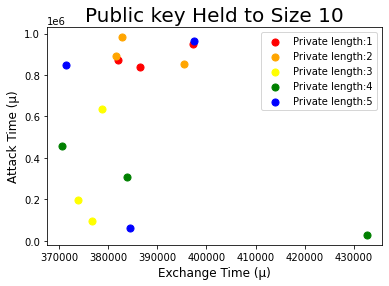

In [5]:
for i in range(5):
    tempArr = static_public[np.where(static_public[:, 3] == private_values[i])]
    scatter = plt.scatter(tempArr[:,0], tempArr[:,1], c=colors[i], s = 50, label='Private length:' + str(private_values[i]))
plt.xlabel("Exchange Time (μ)", size=12)
plt.ylabel("Attack Time (μ)", size=12)
plt.title('Public key Held to Size 10', size=20)
plt.legend()
plt.show()

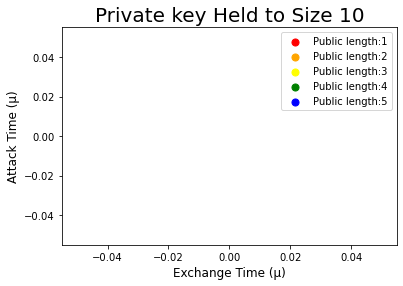

In [6]:
for i in range(5): 
    tempArr = static_private[np.where(static_private[:, 2] == public_values[i])]
    scatter = plt.scatter(tempArr[:,0], tempArr[:,1], c=colors[i], s = 50, label='Public length:' + str(public_values[i]))
plt.xlabel("Exchange Time (μ)", size=12)
plt.ylabel("Attack Time (μ)", size=12)
plt.title('Private key Held to Size 10', size=20)
plt.legend()
plt.show()